In [ ]:
"""
Prendere in considerazione i dati presenti al link

https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv


Analizzarli attentemente e poi realizzare un notebook che estragga le seguenti informazioni:

1. il numero di record presente nel file
2. il numero di regioni presente nel file
3. il numero di abitanti di ogni regione. Ordinare in ordine decrescente sul numero di abitanti
4. la regione con il numero di abitanti più alto
5. il numero medio di abitanti delle regioni

6. le regioni che hanno più abitanti della media degli abitanti delle regioni
7. la regione che ha più abitanti nella fascia 12-19
8. il numero di abitanti per ogni fascia d'età
9. la fascia d'età con più abitanti

Creare poi i seguenti grafici:

10.  un grafico a barre orizzontali per l'esercizio 3
11. un grafico a barre verticali per l'esercizio 8
12. un grafico a torta per l'esercizio 3 che riporti le percentuali

Inserite in ogni grafico, dove possibile, il titolo, i nomi degli assi e la legenda. Fare in modo che le infomrazioni inserite siano leggibili. Fare in modo che le barre dei grafici a barre abbiano 5 colori diversi.

Per caricare i dati nel dataframe, utilizzare il metodo più veloce. Al termibe scaricare da Colab il proprio notebook e consegnarlo.
"""
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv')

1. il numero di record presente nel file

In [ ]:
len(df)

189

2. il numero di regioni presente nel file

In [ ]:
len(df.groupby('reg').count())

21

3. il numero di abitanti di ogni regione. Ordinare in ordine decrescente sul numero di abitanti

In [ ]:
df.groupby('reg').sum()[['totale_popolazione']].sort_values(by='totale_popolazione', ascending=False)

,totale_popolazione
reg,
Lombardia,9904997
Lazio,5530930
Campania,5484138
Veneto,4684641
Sicilia,4629898
Emilia-Romagna,4300226
Piemonte,4175308
Puglia,3819923
Toscana,3583122


4. la regione con il numero di abitanti più alto

In [ ]:
df[df["totale_popolazione"] == df["totale_popolazione"].max()]["reg"]

77    Lombardia
Name: reg, dtype: object

5. il numero medio di abitanti delle regioni

In [ ]:
df.groupby('reg').sum().mean()

totale_popolazione    2.745241e+06
dtype: float64

6. le regioni che hanno più abitanti della media degli abitanti delle regioni

In [ ]:
dfoup = df.groupby('reg').sum() > df.groupby('reg').sum().mean()
dfoup[dfoup.totale_popolazione == True].index

Index(['Campania', 'Emilia-Romagna', 'Lazio', 'Lombardia', 'Piemonte',
       'Puglia', 'Sicilia', 'Toscana', 'Veneto'],
      dtype='object', name='reg')

7. la regione che ha più abitanti nella fascia 12-19

In [ ]:
df[df["totale_popolazione"] == df["totale_popolazione"][df["eta"] == "12-19"].max()]['reg']

73    Lombardia
Name: reg, dtype: object

8. il numero di abitanti per ogni fascia d'età

In [ ]:
df.groupby('eta').sum()

,totale_popolazione
eta,
05-11,3656069
12-19,4620379
20-29,6040323
30-39,6782798
40-49,8781291
50-59,9619202
60-69,7531587
70-79,6016425
80+,4601980


9. la fascia d'età con più abitanti

In [ ]:
df.groupby('eta').sum()[['totale_popolazione']].sort_values(by='totale_popolazione', ascending=False).head(1).drop('totale_popolazione', axis=1)

""
eta
50-59


Creare poi i seguenti grafici:

10.  un grafico a barre orizzontali per l'esercizio 3

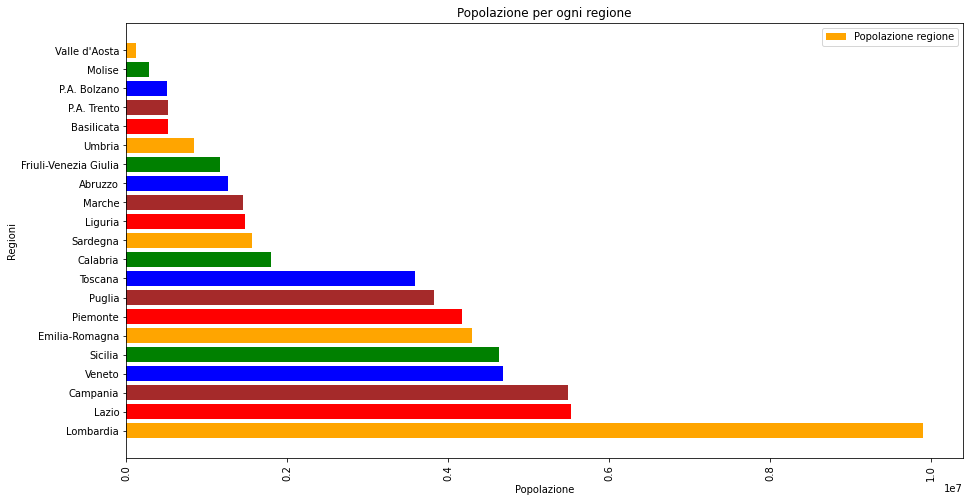

In [ ]:
dfDati = df.groupby('reg').sum()[['totale_popolazione']].sort_values(by='totale_popolazione', ascending=False)
label = dfDati.index
dati = dfDati['totale_popolazione']
fig, ax = plt.subplots(figsize=(15,8))
ax.barh(label, dati, label='Popolazione regione', color=['Orange', 'Red', 'Brown', 'Blue','Green'])
plt.xticks(rotation=90)
ax.set_title('Popolazione per ogni regione')
ax.set_ylabel('Regioni')
ax.set_xlabel('Popolazione')
ax.legend()

11. un grafico a barre verticali per l'esercizio 8

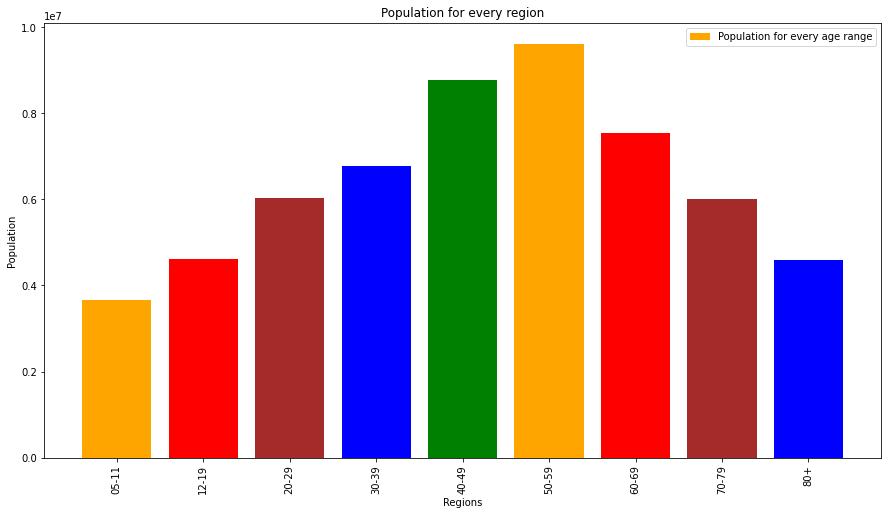

In [ ]:
dfDati = df.groupby('eta').sum()
labels = dfDati.index
dati = dfDati['totale_popolazione']


fig, ax = plt.subplots(figsize=(15,8))
ax.bar(labels, dati, label='Population for every age range', color=['Orange', 'Red', 'Brown', 'Blue','Green'])
plt.xticks(rotation=90)
ax.set_title('Population for every region')
ax.set_ylabel('Population')
ax.set_xlabel('Regions')
ax.legend()